In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cars_df = pd.read_csv('data/cars_after_eda.csv')
cars_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine_cc,max_power_bhp,seats,brand,model,model_variants,km_driven_bin,engine_bin,mileage_bin
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,Maruti,Swift,Dzire VDI,140000 km - 150000 km,1200 cc - 1300 cc,20 kmpl - 25 kmpl
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,Skoda,Rapid,1.5 TDI Ambition,110000 km - 120000 km,1400 cc - 1500 cc,20 kmpl - 25 kmpl
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,Honda,City,2017-2020 EXi,130000 km - 140000 km,1400 cc - 1500 cc,15 kmpl - 20 kmpl
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,Hyundai,i20,Sportz Diesel,120000 km - 130000 km,1300 cc - 1400 cc,20 kmpl - 25 kmpl
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,Maruti,Swift,VXI BSIII,110000 km - 120000 km,1200 cc - 1300 cc,15 kmpl - 20 kmpl


In [3]:
from dash import Dash, dcc, html, Input, Output

app = Dash(__name__)


app.layout = html.Div([
    html.H4('Analysis of the cars sales based on '),
    dcc.Graph(id="graph"),
    html.P("Names:"),
    dcc.Dropdown(id='names',
        options=['Manufacturer', 'transmission', 'fuelType'],
        value='model', 
        multi=False,
        clearable=False
    ),
    html.P("Values:"),
    dcc.Dropdown(id='values',
        options=['price'],
        value='price', clearable=False
    ),
])


@app.callback(
    Output("graph", "figure"), 
    Input("names", "value"), 
    Input("values", "value"))
def generate_chart(names, values):
    df = cars_df # replace with your own data source
    fig = sns.countplot(df, x=names, y=values, hue="fuelType")
    #fig = px.pie(df, values=values, names=names, hole=.3)
    return fig

app.run_server(debug=True)

/Users/nikoma/Documents/Greenbootcamps/DS_final_project/.venv/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[3], line 30, in generate_chart(names='model', values='price')
     24 @app.callback(
     25     Output("graph", "figure"), 
     26     Input("names", "value"), 
     27     Input("values", "value"))
     28 def generate_chart(names, values):
     29     df = cars_df # replace with your own data source
---> 30     fig = sns.countplot(df, x=names, y=values, hue="fuelType")
        df =                               name  year  selling_price  km_driven    fuel   
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel  \
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     1

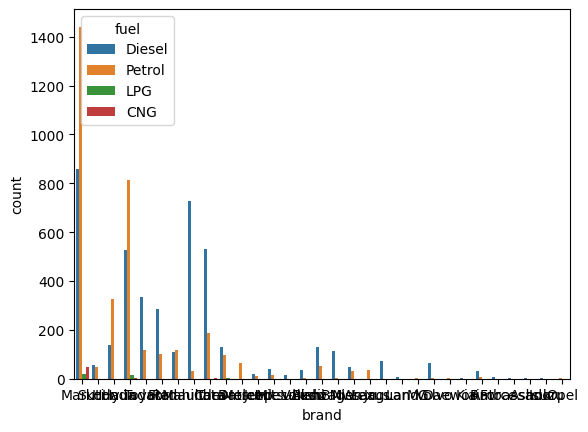

In [5]:
import seaborn as sns

fig = sns.countplot(data=cars_df, x="brand", hue="fuel")

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

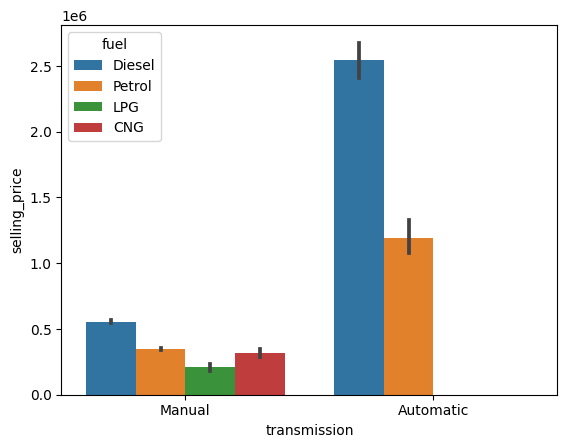

In [6]:
sns.barplot(data=cars_df, x="transmission", y="selling_price", hue="fuel")

<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

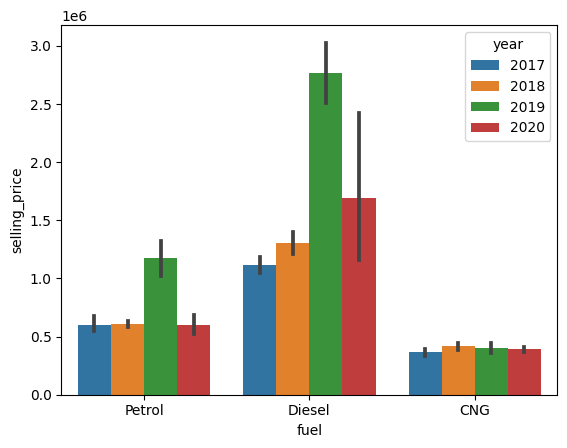

In [7]:
sns.barplot(data=cars_df.query("year > 2016"), x="fuel", y="selling_price", hue="year")

<AxesSubplot:xlabel='brand', ylabel='selling_price'>

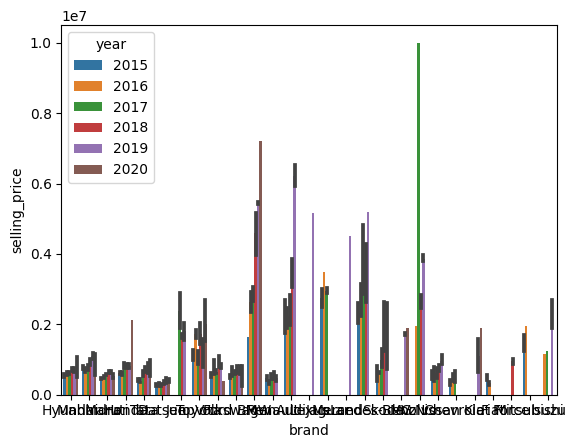

In [8]:
sns.barplot(data=cars_df.query("2021 > year > 2014"), x="brand", y="selling_price", hue="year")

Text(0.5, 0, 'Price')

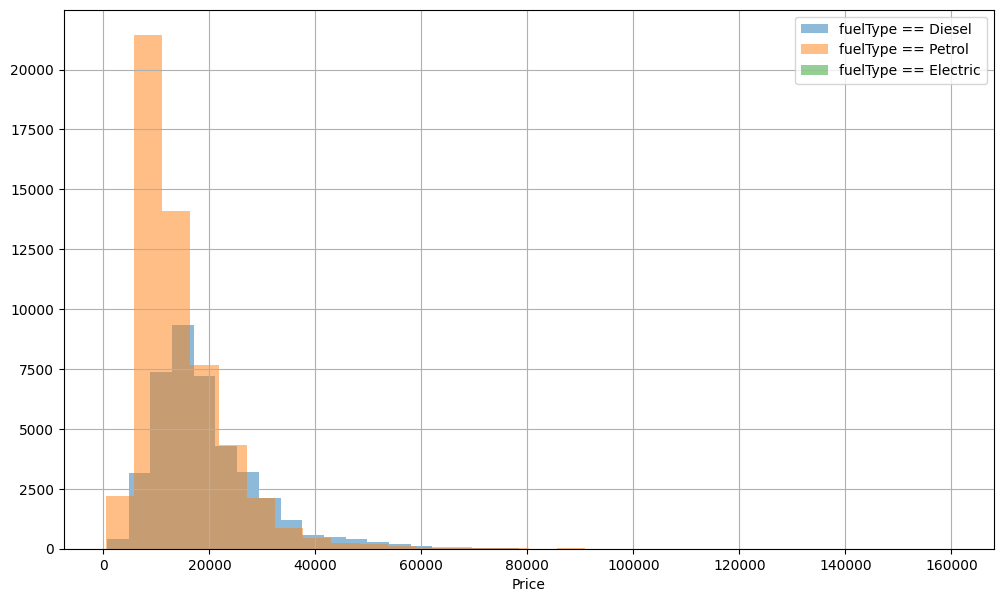

In [4]:
figure = plt.figure(figsize=(12,7))
cars_df.query("fuelType == 'Diesel'")['price'].hist(alpha=0.5, bins=30, label='fuelType == Diesel')
cars_df.query("fuelType == 'Petrol'")['price'].hist(alpha=0.5, bins=30, label='fuelType == Petrol')
cars_df.query("fuelType == 'Electric'")['price'].hist(alpha=0.5, bins=30, label='fuelType == Electric')


plt.legend()
plt.xlabel('Price')